In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df=pd.read_csv('titanic_toy.csv')


In [21]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [23]:
df.isnull().sum()

Age         177
Fare         45
Family        0
Survived      0
dtype: int64

In [24]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

# missing value imputation using custom logic

inserting 99 and -1 value for missing value heuristic approach

In [25]:
df['age_plus']=df['Age'].fillna(99)
df['age_minus']=df['Age'].fillna(-1)

In [26]:
df['fare_plus']=df['Fare'].fillna(999)
df['fare_minus']=df['Fare'].fillna(-1)

In [27]:
df.head()

,Age,Fare,Family,Survived,age_plus,age_minus,fare_plus,fare_minus
0,22.0,7.2500,1,0,22.0,22.0,7.2500,7.2500
1,38.0,71.2833,1,1,38.0,38.0,71.2833,71.2833
2,26.0,7.9250,0,1,26.0,26.0,7.9250,7.9250
3,35.0,53.1000,1,1,35.0,35.0,53.1000,53.1000
4,35.0,8.0500,0,0,35.0,35.0,8.0500,8.0500


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         714 non-null    float64
 1   Fare        846 non-null    float64
 2   Family      891 non-null    int64  
 3   Survived    891 non-null    int64  
 4   age_plus    891 non-null    float64
 5   age_minus   891 non-null    float64
 6   fare_plus   891 non-null    float64
 7   fare_minus  891 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 55.8 KB


variance before null and after null value imputation

In [29]:
print(df['Age'].var())
print(df['age_plus'].var())
print(df['fare_plus'].var())

print(df['Fare'].var())
print(df['age_minus'].var())
print(df['fare_minus'].var())


211.01912474630802
934.439777589377
47268.69867189284
2530.6730768999514
319.24742711837473
2455.8874359377774


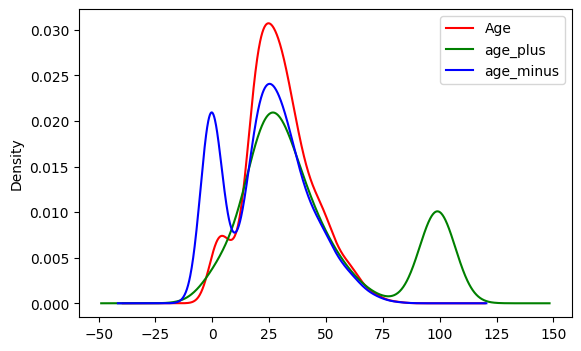

In [34]:
fig=plt.figure(figsize=(14,4))
ax=fig.add_subplot(121)

# kde plot
df['Age'].plot(kind='kde',ax=ax,color='red')

# kde plus plot
df['age_plus'].plot(kind='kde',ax=ax,color='green')

# kde minus plot
df['age_minus'].plot(kind='kde',ax=ax,color='blue')
line,labels=ax.get_legend_handles_labels()
ax.legend(line,labels,loc='best')

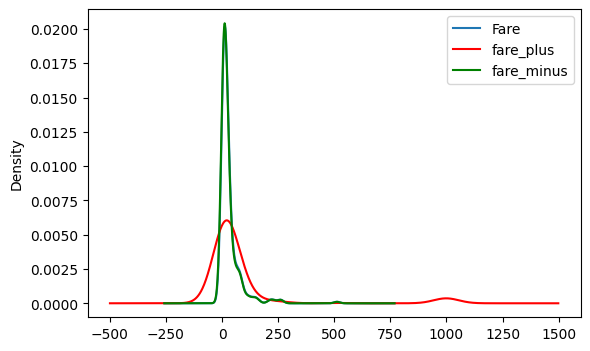

In [35]:
fig=plt.figure(figsize=(14,4))
ax=fig.add_subplot(121)

df['Fare'].plot(kind='kde')
df['fare_plus'].plot(kind='kde',color='red')
df['fare_minus'].plot(kind='kde',color='green')

line,legend=ax.get_legend_handles_labels()
ax.legend(line,legend,loc='best')

# missing value imputation using scikit learn 

In [36]:
x=df.drop(columns='Survived')
y=df['Survived']

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(712, 7)
(179, 7)
(712,)
(179,)


In [39]:
from sklearn.impute import SimpleImputer
imputer1=SimpleImputer(strategy='constant',fill_value=99)
imputer2=SimpleImputer(strategy='constant',fill_value=999)


In [41]:
from sklearn.compose import ColumnTransformer
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
 ],remainder='passthrough'
)
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])